In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Importing the data file

filename = "/content/ADNIMERGE.csv"
data = pd.read_csv(filename)

In [ ]:
shape(data)

In [ ]:
# Dropping missing values from target class

data = data.dropna(subset = ['DX_bl', 'DX'])

In [ ]:
# Numerical columns

norm = ['AGE', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4',
       'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 
       'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'IMAGEUID', 'Ventricles',
       'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'mPACCdigit', 'mPACCtrailsB',
       'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl',
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl',
       'mPACCdigit_bl', 'mPACCtrailsB_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
       'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
       'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
       'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
       'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'ABETA_bl',
       'TAU_bl', 'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'Years_bl',
       'Month_bl', 'Month', 'M']

In [ ]:
from collections import OrderedDict

# Mapping categorical features to numerical values (manual)

data['DX'] = data['DX'].map({'CN' : 0, 'MCI' : 1, 'Dementia' : 2})

In [ ]:
# Filling null values with mean value of RID groups

data[norm] = data.groupby('RID')[norm].transform(lambda grp: grp.fillna(round(np.mean(grp),3)))

In [ ]:
# Filling remaining null values with mean value of column

data[norm] = data[norm].fillna(round(data[norm].mean(),3))    

In [ ]:
from scipy.stats import zscore

# Normalizing numerical columns

data[norm] = zscore(data[norm])

In [ ]:
data.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing datasets

train_data, test_data = train_test_split(data, test_size = 0.20)

In [ ]:
# Encoding categorical columns of training data

enc_train_data = pd.get_dummies(train_data, columns = ['PTGENDER', 'DX_bl', 'PTETHCAT', 'PTRACCAT', 'PTMARRY'])

In [ ]:
# Encoding categorical columns of test data

enc_test_data = pd.get_dummies(test_data, columns = ['PTGENDER', 'DX_bl', 'PTETHCAT', 'PTRACCAT', 'PTMARRY'])

In [ ]:
cor_rel = enc_test_data.corr()

#Correlation with output variable
cor_rel_out = abs(cor_rel[['DX']])

#Selecting highly correlated features
rel_features = cor_rel_out[cor_rel_out>0.3]

In [ ]:
X = enc_train_data[['DX_bl_AD', 'DX_bl_CN', 'CDRSB', 'MMSE',
       'MOCA', 'FDG', 'ADAS11', 'ADAS13', 'ADASQ4', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_perc_forgetting', 'LDELTOTAL',
       'DIGITSCOR','TRABSCOR', 'FAQ', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 
       'EcogSPDivatt', 'EcogSPTotal', 'Hippocampus', 'Entorhinal', 'MidTemp', 'mPACCdigit', 'mPACCtrailsB', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl',
       'mPACCdigit_bl', 'mPACCtrailsB_bl', 'Hippocampus_bl', 'Entorhinal_bl', 'MOCA_bl', 'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPPlan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl']]
Y = enc_train_data[['DX']]
X1= enc_test_data[['DX_bl_AD', 'DX_bl_CN', 'CDRSB', 'MMSE',
       'MOCA', 'FDG', 'ADAS11', 'ADAS13', 'ADASQ4', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_perc_forgetting', 'LDELTOTAL',
       'DIGITSCOR','TRABSCOR', 'FAQ', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 
       'EcogSPDivatt', 'EcogSPTotal', 'Hippocampus', 'Entorhinal', 'MidTemp', 'mPACCdigit', 'mPACCtrailsB', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl',
       'mPACCdigit_bl', 'mPACCtrailsB_bl', 'Hippocampus_bl', 'Entorhinal_bl', 'MOCA_bl', 'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPPlan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl']]
Y1 = enc_test_data[['DX']]
Y = np.ravel(Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Applying Random Forest Classifier and printing the accuracy

forest = RandomForestClassifier(n_estimators=50, max_depth = 10, criterion = "entropy")
forest = forest.fit(X,Y)
print('Random Forest score = {:.2f}'.format(forest.score(X1, Y1)*100))

Random Forest score = 91.32


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Defining Confusion Matrix 

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()

<Figure size 2160x2160 with 0 Axes>

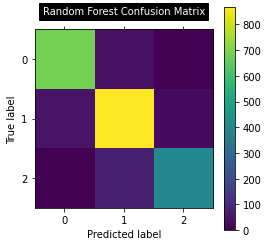

In [ ]:
# Plotting Confusion Matrix for Random Forest Classifier

y_pred=forest.predict(X1)

cm = confusion_matrix(Y1, y_pred)
plt.figure(figsize=(30,30))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tick_params(labelbottom = True, labeltop = False)
plt.title('Random Forest Confusion Matrix', color = 'white', backgroundcolor = 'black', fontsize = 10)
plt.show()

In [ ]:
from sklearn import svm

# Applying SVM with radial (RBF) kernel and printing the accuracy
sup = svm.SVC(C = 1, kernel = 'rbf', gamma = 0.001, decision_function_shape= 'ovo')
sup.fit(X,Y)
print('SVM score = {:.2f}'.format(sup.score(X1, Y1)*100))

SVM score = 87.87


<Figure size 720x720 with 0 Axes>

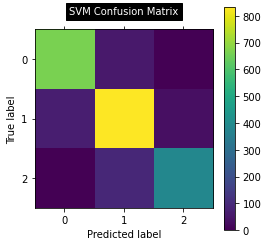

In [ ]:
# Plotting Confusion Matrix for Support Vector Machine Classifier

y_pred=sup.predict(X1)

cm = confusion_matrix(Y1, y_pred)
plt.figure(figsize=(10,10))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tick_params(labelbottom = True, labeltop = False)
plt.title('SVM Confusion Matrix', color = 'white', backgroundcolor = 'black', fontsize = 10)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Applying Logistic Regression Classifier and printing the accuracy

logreg = LogisticRegression(max_iter = 1050)
logreg.fit(X, Y) 
print('Logistic Regression score = {:.2f}'.format(logreg.score(X1, Y1)*100))

Logistic Regression score = 91.28


<Figure size 720x720 with 0 Axes>

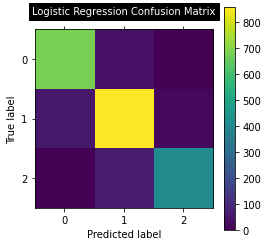

In [ ]:
# Plotting Confusion Matrix for Logistic Regression Classifier

y_pred=logreg.predict(X1)

cm = confusion_matrix(Y1, y_pred)
plt.figure(figsize=(10,10))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tick_params(labelbottom = True, labeltop = False)
plt.title('Logistic Regression Confusion Matrix', color = 'white', backgroundcolor = 'black', fontsize = 10)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Applying K-Nearest Neighbors Classifier and printing the accuracy

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)
print('K-Nearest Neighbors score = {:.2f}'.format(neigh.score(X1, Y1)*100))

K-Nearest Neighbors score = 87.92


<Figure size 720x720 with 0 Axes>

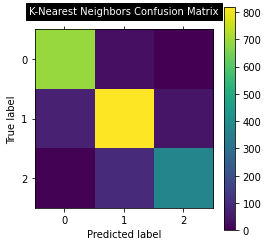

In [ ]:
# Plotting Confusion Matrix for K-Nearest Neighbors Classifier

y_pred=neigh.predict(X1)

cm = confusion_matrix(Y1, y_pred)
plt.figure(figsize=(10,10))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tick_params(labelbottom = True, labeltop = False)
plt.title('K-Nearest Neighbors Confusion Matrix', color = 'white', backgroundcolor = 'black', fontsize = 10)
plt.show()

In [ ]:
# Collecting accuracy of all algorithms into one dictionary

accuracies = {'Random Forest' : round(forest.score(X1, Y1) * 100, 2),
              'SVM' : round(sup.score(X1, Y1) * 100, 2),
              'Logistic Regression' : round(logreg.score(X1, Y1) * 100, 2),
              'KNN' : round(neigh.score(X1,Y1) * 100, 2)}

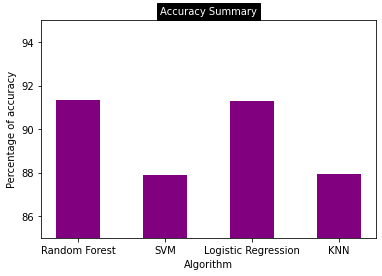

In [ ]:
# Plotting accuracies of all algorithms as a bar graph

plt.bar(accuracies.keys(), height = accuracies.values(), color = 'purple', width = 0.5)
plt.ylabel('Percentage of accuracy')
plt.xlabel('Algorithm')
plt.ylim(85,95)
plt.title('Accuracy Summary', color = 'white', backgroundcolor = 'black', fontsize = 10)
plt.show()